## Jon Ishaque 
## ATU. HDip Dat Analytics Machine Learning and Statistics
## 01. Statistics


<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />


The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.



Adapted from:https://stackoverflow.com/a/4941932 to get combinations

In [1]:
#math module
from math import comb
    

In [2]:
#number of ways of selecting 4 cups from 8
comb(8,4)

70

In [3]:
#number of ways of selecting 5 cups from 10
comb(10,5)

252

In [4]:
#Probability of randomly selecting correct 5 cups is:
1.0/comb(10,5)
    

0.003968253968253968

So, if experiement done with 10 cups total, 5 with milk first, 5 with tea first then the probability of randomly selecting the correct answer is less than 1%.

Of course, we could design the experiment with 9 cups in total, 4 tea in first,5 milk in first.


In [5]:
#randomly select 4 cups from 9
#Probability of randomly selecting correct 5 cups is:
1.0/comb(9,4)

0.007936507936507936

This is closer to 1 percent.

In [6]:
#randomly select 5 cups from 9
#Probability of randomly selecting correct 5 cups is:
1.0/comb(9,5)

0.007936507936507936

This is the same as 4 from 9 as to get the 4 from 9 you will get the 5 other cups from 9.


<h3 style="color: #001a79;">Bonus:</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?.</i>

To  the answer to the bonus question I have used the notebook from the lecture where I define the number of cups in list
and the distribution chart which shows the number number of chances of getting 4 right,3 right, 2 right etc.
I have repeatedly ran the cells whilst incrementing the number of cups in the list each time until 3 right will maintain a 1% probablity

In [7]:
# The labeled cups cups.

cups = list(range(18))

#number of ways of selecting 4 cups from 18
comb(18,4)

3060

The 3060 possibilities can be enumerated using the combinations function from the itertools Python package.

It takes a list 𝑙 of items(cups) and a number 𝑛 (4) . It returns/generates each way of selecting 𝑛 unordered items from 𝑙 . 

In [8]:
import itertools
#get 
poss = list(itertools.combinations(cups, 4))
#poss #possible combinations

[Text(0.5, 0, 'No. correct cups'),
 Text(0, 0.5, 'Possiblities'),
 Text(0.5, 1.0, 'Distribution chart for Lady Tasting Tea experiment')]

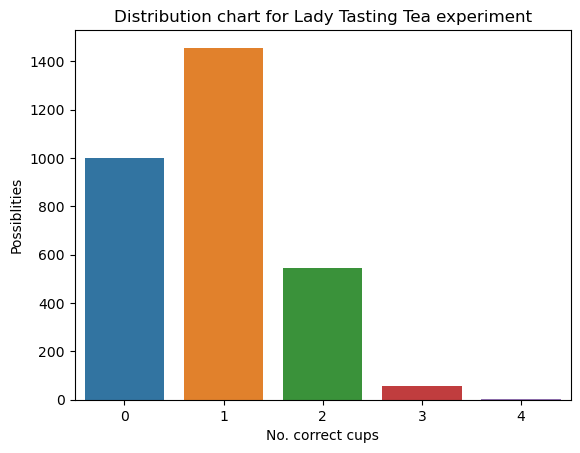

In [9]:
import random
import seaborn as sns # for count plot


# Pick a random correct answer from the list of 495 to simulate the experiment.
milkfirst = set(random.choice(poss)) #


#So to allow one wrong cup -  (3 right below) 30 ways of getting 3 cups right (30/330 approx 1%)

counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# Creat the plot.
tea_exp = sns.countplot(x=counts);

tea_exp.set(xlabel ="No. correct cups", ylabel = "Possiblities", title ='Distribution chart for Lady Tasting Tea experiment')

In [10]:
30/3060 *100

0.9803921568627451

### Running the experiment with 18 Cups there 30 combinations of one wrong cup out of 3060 possible combinations of 4 cup so to allow one wrong cup the experiment will need 18 cups.

<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

In [11]:
#statistical methods.
import scipy.stats as ss

In [12]:
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

So, the SciPy fisher_exact function takes a table and an optional alternaive as parameters.

To emulate the Tea tasting problem using the fisher_exact function I will need to get this probability.
Target: 0.014285714285714285

The table is a 2-dimensional list. eg [[8,2],[1,5]]
In our case the columns could be Tea First, Milk First
and the rows could be the actual outcomes.
So in this limited table of outcomes(rows) we could say:

[4,0] i.e. 4 cups were correctly as Tea First 

and 

[0,4] i.e. 4 cups selected as Milk First  

The whole list would be: [[4,0],[0,4]]

In [13]:
#to make make code more efficient I will define the table here
table=[[4, 0], [0, 4]]

In [14]:
ss.fisher_exact(table)

(inf, 0.028571428571428536)

In [15]:
0.014285714285714285 * 2 #fisher comes out 2 x prob from lecture content.

0.02857142857142857

When I use the 'greater' alternative parameter I get 1.4 percent probabability. Why?

In [16]:
ss.fisher_exact(table,'greater')

(inf, 0.014285714285714268)

Because it is the alternavive hypothesis, Fisher's hypotheses was the Null hypotheses that the lady could not tell how which was poured first. The alternative is that she can tell, and there is a 1.4 percent that would occur randomly. So what is the first number returned without an alternative parameter, i.e, 0.02857142857142857.

In [17]:
ss.fisher_exact(table,'two-sided')

(inf, 0.028571428571428536)

According to the documentation is the default alternative hypotheses'two-sided'. As our experiment is symetric, that is 4 right cups is the same as 4 wrong cups, I think the 2.8 percent probability is that of having 4 right or 4 wrong.

<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />


Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

In [18]:
from scipy import stats as ss
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

#use numpy random number generator.
rng = np.random.default_rng()

# Plotting.
import matplotlib.pyplot as plt

# Alternative statistics package.
import statsmodels.stats.weightstats as stat


### 1. Independend t-test on values with same mean
Perform independent t-test also known as two sample t-test to test how similar the means of the samples are (or are not):
In this case the means are identical

In [19]:

#loc=mean, scale=SD, size=sample size

a = np.random.normal(loc=5, scale=10, size=50)
b = np.random.normal(loc=5, scale=10, size=50)

#compare two characateristics of two samples 
#But if the sample means are the same
#the null hypotheses is: 

t_ss, p_ss =ss.ttest_ind(a, b)

print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: 0.05689157764106276	p-value: 0.9547473985660614
P_scipy: 0.95


In [20]:
#Also run the stats_model version to get degrees of freedom, "the number of values that are free to vary,i.e sample size minus 2"
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")


t-value: 0.05689157764106319	p-value: 0.9547473985660611	Deg Free: 98.0
P_statsmodels: 0.95


Uncomment the code in the next cell to view the data

In [21]:
'''# Stick both samples in one data frame.col category, value
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})
#view the data
df
sns.catplot(x='Category', y='Value', jitter=False, data=df);'''

"# Stick both samples in one data frame.col category, value\ndf = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})\n#view the data\ndf\nsns.catplot(x='Category', y='Value', jitter=False, data=df);"

In [22]:

"The calculated t value is then compared to the critical t value from the t distribution table with degrees of freedom df = n1 + n2 - 2"

'The calculated t value is then compared to the critical t value from the t distribution table with degrees of freedom df = n1 + n2 - 2'

The critical value is used to make a decision regarding the calculation of the  𝑡  statistic from the samples.
It is the value above or below which we make a judgement on the hypotheses
If the null hypotheses is that the means are the same (they are in this case) and the t statistic falls in between the central part of the curve(white space) then we accept null hypothesis

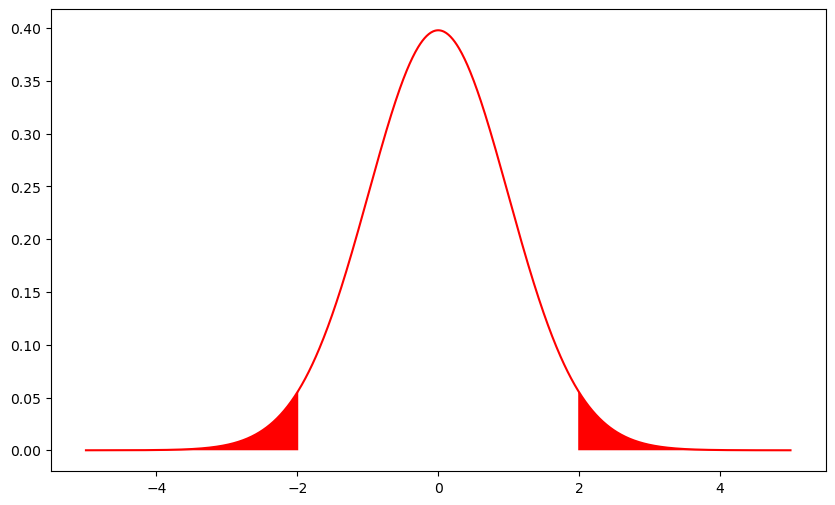

In [23]:
# The critical probability value.
# p value below which you reject thenull hypotheses
t_ss, p_ss = ss.ttest_ind(a, b)

critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

### 2. Independend t-test on values with different means

In [24]:
#loc=mean, scale=SD, size=sample size

a = np.random.normal(loc=5, scale=10, size=50)
c = np.random.normal(loc=10, scale=10, size=50)

#compare two characateristics of two samples 
#But if the sample means are the same
#the null hypotheses is: 

t_ss, p_ss =ss.ttest_ind(a, c)

print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -1.5477753679821433	p-value: 0.12489977372960984
P_scipy: 0.12


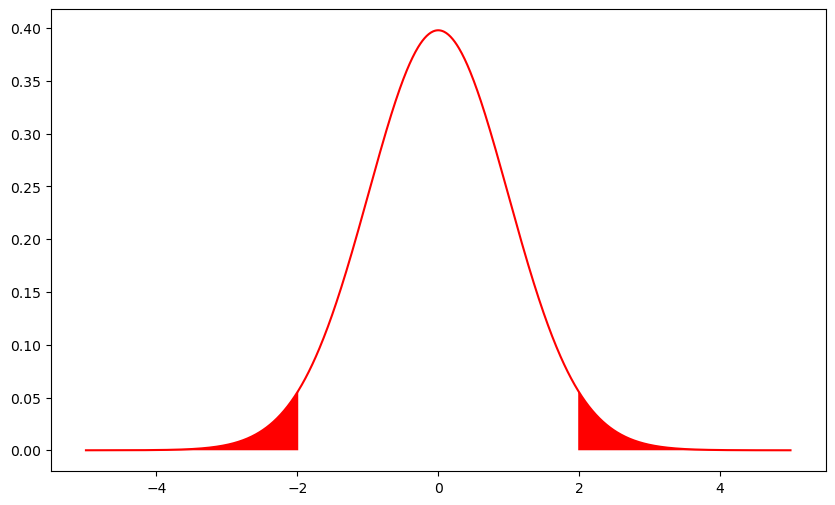

In [25]:
# The critical probability value.
# p value below which you reject thenull hypotheses
t_ss, p_ss = ss.ttest_ind(a, b)

critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

The t statistic falls is less than -2 or greater than 2 - urgo our samples probably have different means.

### 3. ttest_ind underestimates p for unequal variances:

default is true, if false"If False, perform Welch’s t-test, which does not assume equal population variance [2]."

In [32]:
#set new sample with different SD 
a = np.random.normal(loc=5, scale=10, size=50)
d= np.random.normal(loc=5, scale=30, size=50) 
#unequal var, but default is true = var
ss.ttest_ind(a, d)

Ttest_indResult(statistic=-0.22562537873864955, pvalue=0.8219626617987491)

In [33]:
#unequal variance , set as false (same mean)
#The p value is considered to be more accurate
ss.ttest_ind(a, d, equal_var=False)

Ttest_indResult(statistic=-0.22562537873864955, pvalue=0.822234023630102)

### 4. When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:
i.e. the sample sizes are different


In [35]:
a = np.random.normal(loc=5, scale=10, size=50)
e= np.random.normal(loc=5, scale=20, size=100) 
ss.ttest_ind(a, e)


Ttest_indResult(statistic=0.324991784774508, pvalue=0.7456462336721538)

In [37]:
e= np.random.normal(loc=5, scale=20, size=100) 
ss.ttest_ind(a, e, equal_var=False )

Ttest_indResult(statistic=-1.6492431565916768, pvalue=0.10124893675965749)

### 5. T-test with different means, variance, and n:

In [41]:
a = np.random.normal(loc=5, scale=10, size=50)
f = np.random.normal(loc=8, scale=20, size=100)
ss.ttest_ind(a, f,equal_var=False )

Ttest_indResult(statistic=-1.8982072114020976, pvalue=0.05962343283161759)

In [42]:
ss.ttest_ind(a, f)

Ttest_indResult(statistic=-1.5238181844924146, pvalue=0.12968808670585133)

### 6. Increase permutations to get more accurate results

When performing a permutation test, more permutations typically yields more accurate results. Use a np.random.Generator to ensure reproducibility:
The statistic seems to remain the same but the pvalue appears to be more accurate - more decimal places returned.

In [44]:

ss.ttest_ind(a, f, permutations=10000,
                random_state=rng)


Ttest_indResult(statistic=-1.5238181844924146, pvalue=0.1352)

In [45]:
ss.ttest_ind(a, f, permutations=100,
                random_state=rng)

Ttest_indResult(statistic=-1.5238181844924146, pvalue=0.12)

### 7. Using the trim to trim extreme tails (Yuen test).

In [ ]:
Take these two samples, one of which has an extreme tail.

In [51]:
g = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
h = (1.1, 2.9, 4.2)

Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim*len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim*len(b)) is 0.

In [52]:
ss.ttest_ind(g, h, trim=.2)


Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

In [54]:
ss.ttest_ind(g, h) #without the trim the sets are far less likely to have the same mean

Ttest_indResult(statistic=1.099305186099593, pvalue=0.30361296704535845)

https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20is%20commonly%20used%20to%20test,means%20of%20two%20change%20scores

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#r3566833beaa2-2

https://towardsdatascience.com/the-power-of-permutation-testing-c2ac66f2d166